Данный файл необходим чтобы проанализировать аминокислотные паттерны, влияющие на таргетную величину и на кластеризацию на эмбеддингах.

Вход:

- final.csv

Выход:

- Не удалось выявить влияние аминокислотных паттернов на формирование кластеров
- Была выявлена небольшая корреляция таргетной величины с наличием KGL, EKG паттернов


In [1]:
! pip install logomaker
import logomaker as lm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 12.6 MB/s eta 0:00:00


In [2]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 9.7 MB/s eta 0:00:00


In [11]:
#Датасет с дескрипторами и АА
df=pd.read_csv('/content/drive/MyDrive/Datacon/final.csv')

In [12]:
df

,Unnamed: 0,Temp.,"Time, h","Conc., uM",target,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,...,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,group,Sequence
0,0,23.0,0.250000,12.5,650.00,0.0,0.111,0.889,0.0,1.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0,RKKRRQRRR
1,1,23.0,0.166667,12.5,31.25,0.0,0.125,0.875,0.0,1.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2,RKKRRQRR
2,2,23.0,0.166667,12.5,10.00,0.0,0.143,0.857,0.0,1.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2,RKKRRQR
3,3,23.0,0.166667,12.5,22.50,0.0,0.125,0.875,0.0,1.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2,KKRRQRRR
4,4,23.0,0.166667,12.5,20.00,0.0,0.143,0.857,0.0,1.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,1278,37.0,24.000000,50000.0,50.00,0.0,0.000,1.000,0.0,0.556,...,44.444,66.667,88.889,0.0,0.0,0.0,0.0,0.0,1,RHRHRHRHR
1279,1279,37.0,24.000000,50000.0,100.00,0.0,0.000,1.000,0.0,0.600,...,50.000,70.000,90.000,0.0,0.0,0.0,0.0,0.0,1,RRHRHRHRHR
1280,1280,37.0,24.000000,50000.0,250.00,0.0,0.000,1.000,0.0,0.636,...,54.545,72.727,90.909,0.0,0.0,0.0,0.0,0.0,1,RRRHRHRHRHR
1281,1281,37.0,24.000000,50000.0,400.00,0.0,0.000,1.000,0.0,0.667,...,58.333,75.000,91.667,0.0,0.0,0.0,0.0,0.0,1,RRRRHRHRHRHR


In [13]:
df=df.drop(columns=['Unnamed: 0'])
df

,Temp.,"Time, h","Conc., uM",target,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,...,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,group,Sequence
0,23.0,0.250000,12.5,650.00,0.0,0.111,0.889,0.0,1.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0,RKKRRQRRR
1,23.0,0.166667,12.5,31.25,0.0,0.125,0.875,0.0,1.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2,RKKRRQRR
2,23.0,0.166667,12.5,10.00,0.0,0.143,0.857,0.0,1.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2,RKKRRQR
3,23.0,0.166667,12.5,22.50,0.0,0.125,0.875,0.0,1.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2,KKRRQRRR
4,23.0,0.166667,12.5,20.00,0.0,0.143,0.857,0.0,1.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,37.0,24.000000,50000.0,50.00,0.0,0.000,1.000,0.0,0.556,0.444,...,44.444,66.667,88.889,0.0,0.0,0.0,0.0,0.0,1,RHRHRHRHR
1279,37.0,24.000000,50000.0,100.00,0.0,0.000,1.000,0.0,0.600,0.400,...,50.000,70.000,90.000,0.0,0.0,0.0,0.0,0.0,1,RRHRHRHRHR
1280,37.0,24.000000,50000.0,250.00,0.0,0.000,1.000,0.0,0.636,0.364,...,54.545,72.727,90.909,0.0,0.0,0.0,0.0,0.0,1,RRRHRHRHRHR
1281,37.0,24.000000,50000.0,400.00,0.0,0.000,1.000,0.0,0.667,0.333,...,58.333,75.000,91.667,0.0,0.0,0.0,0.0,0.0,1,RRRRHRHRHRHR


In [14]:
df_=pd.DataFrame()
df_['target']=df['target']
df_['group']=df['group']
df_['Sequence']=df['Sequence']

In [15]:
df_

,target,group,Sequence
0,650.00,0,RKKRRQRRR
1,31.25,2,RKKRRQRR
2,10.00,2,RKKRRQR
3,22.50,2,KKRRQRRR
4,20.00,2,KRRQRRR
...,...,...,...
1278,50.00,1,RHRHRHRHR
1279,100.00,1,RRHRHRHRHR
1280,250.00,1,RRRHRHRHRHR
1281,400.00,1,RRRRHRHRHRHR


In [21]:
!pip install pybiomed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pybiomed: filename=PyBioMed-1.0-py3-none-any.whl size=11266895 sha256=d25a98d4bc139ee712d0d7fc1aa780ce73c51bcddba31f0d3802dff4700d226d
  Stored in directory: /root/.cache/pip/wheels/03/c8/be/74f7e3ad04bbbb4a2977551bc19e784919a025b97ba6da1a17
Successfully built pybiomed


In [34]:
from PyBioMed.PyProtein.AAComposition import (
    CalculateAAComposition,
    CalculateAADipeptideComposition
)

In [35]:
data = CalculateAADipeptideComposition(df_['Sequence'][0])
new_data = {k: list([v]) for k, v in data.items()}
res = pd.DataFrame.from_dict(new_data)
for i in range(1, df_.shape[0]):
  slov = CalculateAADipeptideComposition(df_['Sequence'][i])
  #print(slov)
  #new_slov = {k: list([v]) for k, v in slov.items()}
  res = pd.concat([res, pd.DataFrame.from_records([slov])] ,ignore_index=True)
df_ = pd.concat([df_, res], axis=1, join='inner')
df_

,target,group,Sequence,A,R,N,D,C,E,Q,...,VVL,VVK,VVM,VVF,VVP,VVS,VVT,VVW,VVY,VVV
0,650.00,0,RKKRRQRRR,0.0,66.667,0.0,0.0,0.0,0.0,11.111,...,0,0,0,0,0,0,0,0,0,0
1,31.25,2,RKKRRQRR,0.0,62.500,0.0,0.0,0.0,0.0,12.500,...,0,0,0,0,0,0,0,0,0,0
2,10.00,2,RKKRRQR,0.0,57.143,0.0,0.0,0.0,0.0,14.286,...,0,0,0,0,0,0,0,0,0,0
3,22.50,2,KKRRQRRR,0.0,62.500,0.0,0.0,0.0,0.0,12.500,...,0,0,0,0,0,0,0,0,0,0
4,20.00,2,KRRQRRR,0.0,71.429,0.0,0.0,0.0,0.0,14.286,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,50.00,1,RHRHRHRHR,0.0,55.556,0.0,0.0,0.0,0.0,0.000,...,0,0,0,0,0,0,0,0,0,0
1279,100.00,1,RRHRHRHRHR,0.0,60.000,0.0,0.0,0.0,0.0,0.000,...,0,0,0,0,0,0,0,0,0,0
1280,250.00,1,RRRHRHRHRHR,0.0,63.636,0.0,0.0,0.0,0.0,0.000,...,0,0,0,0,0,0,0,0,0,0
1281,400.00,1,RRRRHRHRHRHR,0.0,66.667,0.0,0.0,0.0,0.0,0.000,...,0,0,0,0,0,0,0,0,0,0


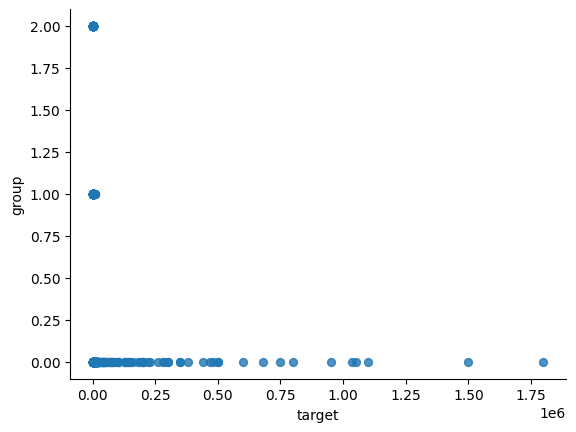

In [18]:
# @title target vs group

from matplotlib import pyplot as plt
df_.plot(kind='scatter', x='target', y='group', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Предварительное разделение на кластеры получилось таким, что 1 и 2 кластеры имеют очень небольшой разброс значений флюоресценции близкий к нулю. Пока сложно сказать, с чем это связано.

In [47]:
correlation_threshold = 0.1  # Например, 0.7

# Вычислите корреляцию между целевым столбцом и другими столбцами
correlations = df_.select_dtypes(include=['number']).corr()['group']

# Отберите столбцы с корреляцией выше порогового значения
selected_columns = correlations[abs(correlations) > correlation_threshold].index

# Вывод результата
print(f"Столбцы с корреляцией больше {correlation_threshold} с '{'target'}':")
print(selected_columns)

Столбцы с корреляцией больше 0.1 с 'target':
Index(['target', 'group', 'C', 'Q', 'H', 'K', 'W', 'C', 'Q', 'H',
       ...
       'WKC', 'YRR', 'YRG', 'YFF', 'YSR', 'YVN', 'VRG', 'VNA', 'VLH', 'VSC'],
      dtype='object', length=152)


<Axes: >

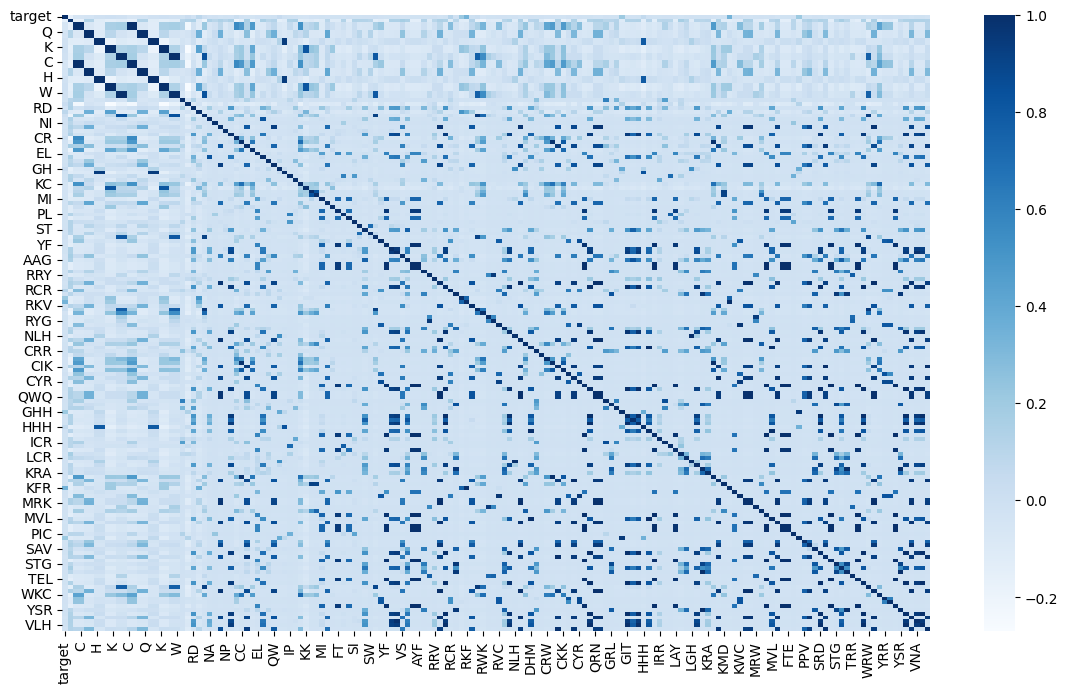

In [48]:
plt.figure(figsize=(14,8))
cmap = sns.color_palette("Blues", as_cmap=True)
#sns.heatmap(df_1[selected_columns], annot=True, cmap=cmap)
sns.heatmap(df_[selected_columns].select_dtypes(include=['number']).corr(), cmap=cmap)

По результатам корреляции трехбуквенных сочетаний аминокислот с группой кластера можно сказать, что данным способом не удается выявить паттерны, влияющие на попадание CPP в тот или иной кластер.

In [42]:
correlation_threshold = 0.25  # Например, 0.7

# Вычислите корреляцию между целевым столбцом и другими столбцами
correlations = df_.select_dtypes(include=['number']).corr()['target']

# Отберите столбцы с корреляцией выше порогового значения
selected_columns = correlations[abs(correlations) > correlation_threshold].index

# Вывод результата
print(f"Столбцы с корреляцией больше {correlation_threshold} с '{'target'}':")
print(selected_columns)

Столбцы с корреляцией больше 0.25 с 'target':
Index(['target', 'NR', 'RNK', 'RKF', 'RFN', 'RWN', 'NRF', 'NKI', 'EKG', 'GLR',
       'IKE', 'LRK', 'KRL', 'KEK', 'KGL', 'KFR', 'FRN', 'FNR', 'WNR'],
      dtype='object')


In [44]:
selected_columns=['target', 'group', 'NR', 'RNK', 'RKF', 'RFN', 'RWN', 'NRF', 'NKI', 'EKG', 'GLR',
       'IKE', 'LRK', 'KRL', 'KEK', 'KGL', 'KFR', 'FRN', 'FNR', 'WNR']

<Axes: >

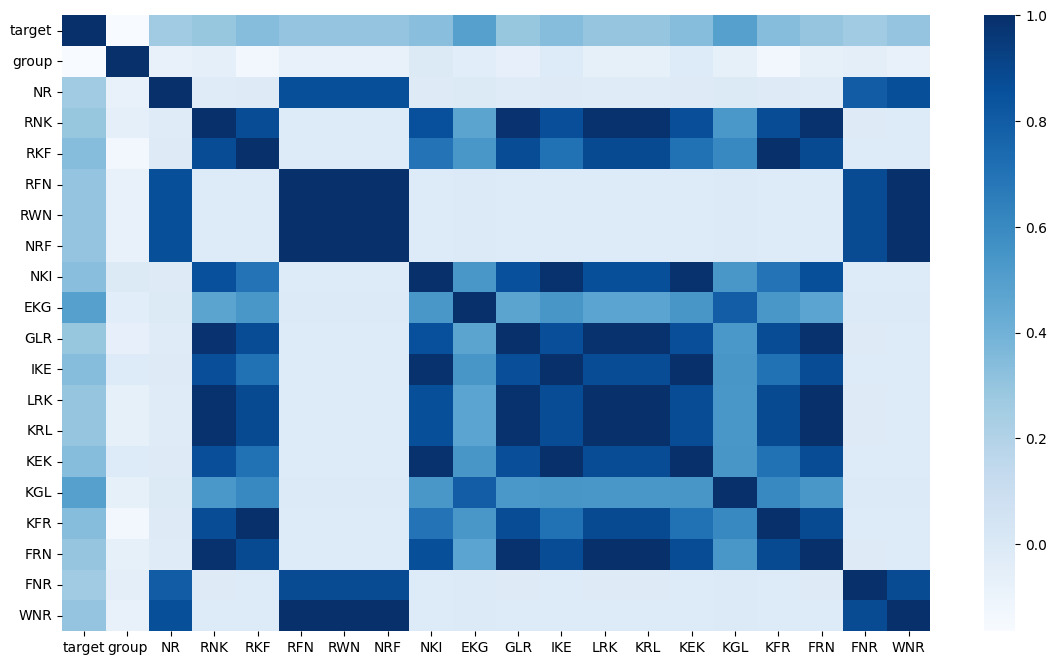

In [45]:
plt.figure(figsize=(14,8))
cmap = sns.color_palette("Blues", as_cmap=True)
#sns.heatmap(df_1[selected_columns], annot=True, cmap=cmap)
sns.heatmap(df_[selected_columns].select_dtypes(include=['number']).corr(), cmap=cmap)

Паттерны KGL, EKG коррелируют с таргетной величиной, что позволяет предполагать, что их внедрение в CPP может способствовать проницаемости через мембрану.

In [41]:
#В дальнейшем файл не используется, но записан на случай если что-то нужно будет перепроверить
df_.to_csv('/content/drive/MyDrive/Datacon/sequence_analysis_AA.csv')